# Image Classification - Lab

## Introduction

Now that you have a working knowledge of CNNs and have practiced implementing associated techniques in Keras, its time to put all of those skills together. In this lab, you'll work to complete a [Kaggle competition](https://www.kaggle.com/c/dog-breed-identification) on classifying dog breeds.


## Objectives

In this lab you will: 

- Compare and apply multiple techniques for tuning a model using data augmentation and pretrained models  

## Download and Load the Data

Start by downloading the data locally and loading it into a Pandas DataFrame. Be forewarned that this dataset is fairly large and it is advisable to close other memory intensive applications.

The data can be found [here](https://www.kaggle.com/c/dog-breed-identification/data).

It's easiest if you download the data into this directory on your local computer. From there, be sure to uncompress the folder and subfolders. If you download the data elsewhere, be sure to modify the file path when importing the file below.

In [ ]:
# No code per se, but download and decompress the data

## Preprocessing

Now that you've downloaded the data, its time to prepare it for some model building! You'll notice that the current structure provided is not the same as our lovely preprocessed folders that you've been given to date. Instead, you have one large training folder with images and a csv file with labels associated with each of these file types. 

Use this to create a directory substructure for a train-validation-test split as we have done previously. Also recall that you'll also want to use one-hot encoding as you are now presented with a multi-class problem as opposed to simple binary classification.

In [1]:
# Your code here; open the labels.csv file stored in the zip file
import pandas as pd
df=pd.read_csv('labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever



In order to input the data into our standard pipeline, you'll need to organize the image files into a nested folder structure. At the top level will be a folder for the training data, a folder for the validation data, and a folder for the test data. Within these top directory folders, you'll then need to create a folder for each of the categorical classes (in this case, dog breeds). Finally, within these category folders you'll then place each of the associated image files. To save time, do this for just 3 of the dog breeds such as `'boston_bull'`, `'toy_poodle'`, and `'scottish_deerhound'`.

You're nested file structure should look like this:
* train
    * category_1
    * category_2
    * category_3
    ...
* val
    * category_1
    * category_2
    * category_3
    ...
* test 
    * category_1
    * category_2
    * category_3
    ...  

> **Hint**: To do this, you can use the `os` module which will you can use to execute many common bash commands straight from your python interpreter. For example, here's how you could make a new folder: 

```python
import os
os.mkdir('New_Folder_Name')
```
Start by creating top level folders for the train, validation, and test sets. Then, use your pandas DataFrame to split the example images for each breed of dog into a 80% train set, and 10% validation and test sets. Use `os.path.join()` with the information from the DataFrame to construct the relevant file path. With this, place the relevant images using the `shutil.copy()` into the appropriate directory. 

>> **Note**: It is worthwhile to try this exercise on your own, but you can also use the images stored under the `'data_org_subset/'` folder of this repository, in which the Kaggle dataset has already been subset and preprocessed.

In [2]:
# Your code here; transform the image files and then load them into Keras as tensors
import os
import shutil
import numpy as np

new_folders=['train','val','test']

old_dir = 'train/'
new_root_dir = 'data_org_subset/'
os.mkdir(new_root_dir) 

for folder in folders:
    new_dir = os.path.join(new_root_dir, folder)
    os.mkdir(new_dir)

    breeds=['boston_bull','toy_poodle','scottish_deerhound']
    for folder in folders:
        new_dir=os.path.join(new_root_dir,folder,breed)
        os.mkdir(new_dir)
        temp=df[df.breeed==breed]
        train,val,test=np.split(temp.sample(frac=1), [int(.8*len(temp)), int(.9*len(temp))])
    
    for i,temp in enumerate([train,val,test]):
        for row in temp.index:
            filename=temp['id'][row]+'.jpg'
            origin=os.path.join(old_dir+filename)
            destination-os.path.join(new_root_dir+dir_names[i]+'/'+breed+'/'+filename)
            shutil.copy(origin,destination)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data_org_subset/'

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = '{}train'.format(new_root_dir)

validation_dir = '{}val/'.format(new_root_dir)
test_dir = '{}test/'.format(new_root_dir)

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=20, 
                                                        class_mode='categorical')

Using TensorFlow backend.


Found 233 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


## Optional: Build a Baseline CNN

This is an optional step. Adapting a pretrained model will produce better results, but it may be interesting to create a CNN from scratch as a baseline. If you wish to, do so here.

In [4]:
# Create a baseline CNN model
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=5,
                           validation_data=validation_generator,validation_steps=50)

Epoch 1/5
100/100 [==============================] - 274s 3s/step - loss: 1.0069 - acc: 0.4946 - val_loss: 0.9169 - val_acc: 0.5333
Epoch 2/5
100/100 [==============================] - 244s 2s/step - loss: 0.7216 - acc: 0.7016 - val_loss: 0.6171 - val_acc: 0.6667
Epoch 3/5
100/100 [==============================] - 212s 2s/step - loss: 0.5149 - acc: 0.7932 - val_loss: 1.0749 - val_acc: 0.7000
Epoch 4/5
100/100 [==============================] - 206s 2s/step - loss: 0.3184 - acc: 0.8823 - val_loss: 0.7396 - val_acc: 0.7000
Epoch 5/5
100/100 [==============================] - 208s 2s/step - loss: 0.1906 - acc: 0.9383 - val_loss: 1.4869 - val_acc: 0.5333


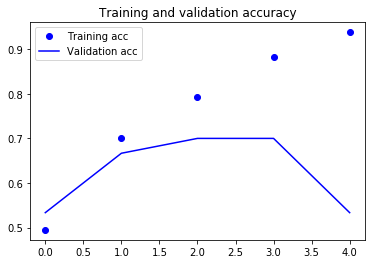

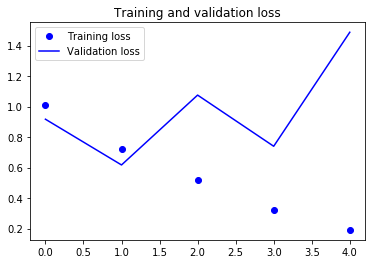

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [6]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))
print('test acc:', test_acc)

Found 30 images belonging to 3 classes.
Generated 810 predictions
test acc: 0.6000000238418579


In [7]:
model.save('Baseline_CNN_dog_subset_run2.h5')

## Loading a Pretrained CNN

## Feature Engineering with the Pretrained Model

As you may well have guessed, adapting a pretrained model will undoubtedly produce better results then a fresh CNN due to the limited size of training data. Import a pretrained model such as VGG-19 to use a convolutional base. Use this to transform the dataset into a rich feature space and add a few fully connected layers on top of the pretrained layers to build a classification model. (Be sure to leave the pretrained model frozen!)

In [8]:
# Your code here; add fully connected layers on top of the convolutional base
from keras.applications import VGG19
cnn_base=VGG19(weights='imagenet',include_top=False,input_shape=(240,240,3))

model2=models.Sequential()
model2.add(cnn_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(64,activation='relu'))
model2.add(layers.Dense(128,activation='relu'))
model2.add(layers.Dense(256,activation='relu'))
model2.add(layers.Dense(128,activation='relu'))
model2.add(layers.Dense(3,activation='softmax'))

cnn_base.trainable=False

model2.summary()

80142336/80134624 [==============================] - 19s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
______________________________________________________

## Visualize History

Now fit the model and visualize the training and validation accuracy/loss functions over successive epochs.

In [9]:
new_root_dir = 'data_org_subset/'

train_dir = '{}train'.format(new_root_dir)
validation_dir = '{}val/'.format(new_root_dir)
test_dir = '{}test/'.format(new_root_dir)

datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 10

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(240, 240), 
                                                    batch_size= 20,
                                                    class_mode='categorical') 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_dir, 
                                                                       target_size=(240, 240), 
                                                                       batch_size=20,
                                                                       class_mode='categorical')

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, 
                                                                        target_size=(240, 240), 
                                                                        batch_size=180,
                                                                        class_mode='categorical',
                                                                        shuffle=False)

        
test_images, test_labels = next(test_generator)

model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model2.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=5,
                              validation_data=val_generator,
                              validation_steps=10)

Found 233 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/5
10/10 [==============================] - 565s 57s/step - loss: 1.0897 - acc: 0.3500 - val_loss: 1.0923 - val_acc: 0.5667
Epoch 2/5
10/10 [==============================] - 538s 54s/step - loss: 1.0484 - acc: 0.4570 - val_loss: 0.9777 - val_acc: 0.4667
Epoch 3/5
10/10 [==============================] - 549s 55s/step - loss: 1.0317 - acc: 0.4508 - val_loss: 0.9338 - val_acc: 0.5667
Epoch 4/5
10/10 [==============================] - 567s 57s/step - loss: 1.0012 - acc: 0.5300 - val_loss: 0.9107 - val_acc: 0.6667
Epoch 5/5
10/10 [==============================] - 545s 55s/step - loss: 0.9831 - acc: 0.5591 - val_loss: 0.9366 - val_acc: 0.6667


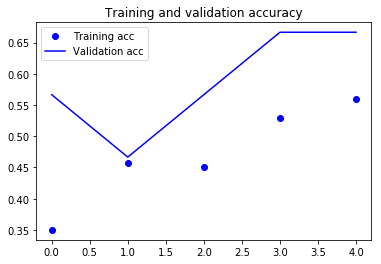

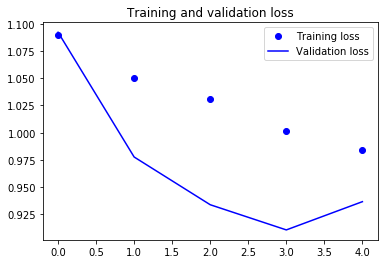

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
# Save model
model2.save('vgg19_3breeds_4epochs.h5')

## Final Model Evaluation

Now that you've trained and validated the model, perform a final evaluation of the model on the test set.

In [12]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(240, 240),
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  shuffle=False)

test_loss, test_acc = model2.evaluate_generator(test_generator, steps=54)
y_hat_test = model2.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))
print('test acc:', test_acc)

Found 30 images belonging to 3 classes.
Generated 810 predictions
test acc: 0.5518518686294556


## Summary

Congratulations! In this lab, you brought all of your prior deep learning skills together from preprocessing including one-hot encoding, to adapting a pretrained model. There are always ongoing advancements in CNN architectures and best practices, but you have a solid foundation and understanding at this point.